In [409]:
import tensorflow as tf
from keras.datasets import mnist
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import Sequential
from tensorflow.keras.losses import MeanSquaredError, BinaryCrossentropy
from tensorflow.keras.activations import sigmoid
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [410]:
# load data
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [411]:
# View data shape
print('X_train shape: {}'.format(X_train.shape),' X_test shape: {}'.format(X_test.shape))
print('X_train sample shape: {}'.format(X_train[0].shape),' X_test sample shape: {}'.format(X_test[0].shape))
print('y_train shape: {}'.format(y_train.shape),'y_test shape: {}'.format(y_test.shape))

X_train shape: (60000, 28, 28)  X_test shape: (10000, 28, 28)
X_train sample shape: (28, 28)  X_test sample shape: (28, 28)
y_train shape: (60000,) y_test shape: (10000,)


In [429]:
# Inspect data occurrence
for i in range(1,10):
    print('Number of {} in training set: {}'.format(i,np.count_nonzero(X_train == i)))

Number of 1 in training set: 22896
Number of 2 in training set: 33653
Number of 3 in training set: 36040
Number of 4 in training set: 38267
Number of 5 in training set: 39148
Number of 6 in training set: 37692
Number of 7 in training set: 38856
Number of 8 in training set: 30878
Number of 9 in training set: 38234


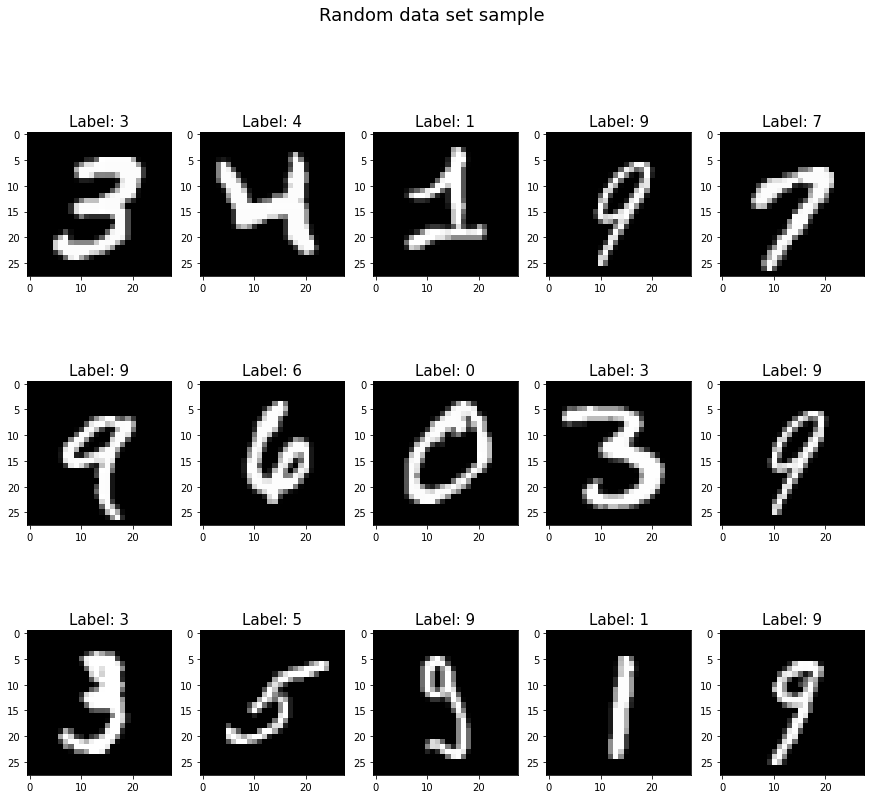

In [321]:
#vizualize imported training set
def plot_data_samples(X_train,y_train):
    rows = 3
    samples = 5

    fig, ax = plt.subplots(3,5,figsize=(15,13))
    fig.suptitle('Random data set sample', size=18)

    for i in range(rows):
        for j in range(samples):
            rand = np.random.randint(0,50)
            ax[i,j].imshow(X_train[rand],interpolation='nearest',cmap='gray')
            ax[i,j].set_title('Label: {}'.format(y_train[rand]),size=15)

plot_data_samples(X_train,y_train)

In [322]:
#reshape X to feed model (sample.shape = (1,(28*28)) = (1,784))
X_train = np.reshape(X_train,(-1,784))
X_test = np.reshape(X_test,(-1,784))

# Turn labels into one-hot vector
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# Reserve 10,000 samples for validation
x_val = X_train[-10000:]
y_val = y_train[-10000:]

print('X_train shape: {}'.format(X_train.shape),' X_test shape: {}'.format(X_test.shape))
print('X_train sample shape: {}'.format(X_train[0].shape),' X_test sample shape: {}'.format(X_test[0].shape))
print('y_train shape: {}'.format(y_train.shape),'y_test shape: {}'.format(y_test.shape))

X_train shape: (60000, 784)  X_test shape: (10000, 784)
X_train sample shape: (784,)  X_test sample shape: (784,)
y_train shape: (60000, 10) y_test shape: (10000, 10)


In [323]:
#Normalize data (values between 0-1)
X_train = X_train.astype('float32')/255
X_test = X_test.astype('float32')/255

In [324]:
# tensorflow deep leanring model
tf.random.set_seed(1234) #applied to achieve consistent results
model = Sequential(
[
    tf.keras.Input(shape=(784,)),
    tf.keras.layers.Dense(units= 64, activation = 'sigmoid', name = 'layer1'),
    tf.keras.layers.Dense(units= 64, activation = 'sigmoid', name = 'layer2'),
    tf.keras.layers.Dense(units=10, activation = 'sigmoid', name = 'layer3'),
  
])

model.summary()

Model: "sequential_26"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 layer1 (Dense)              (None, 64)                50240     
                                                                 
 layer2 (Dense)              (None, 64)                4160      
                                                                 
 layer3 (Dense)              (None, 10)                650       
                                                                 
Total params: 55,050
Trainable params: 55,050
Non-trainable params: 0
_________________________________________________________________


In [377]:
#Compile model
#The model.compile statement defines a loss function and specifies a compile optimization.
#The model.fit statement runs gradient descent and fits the weights to the data.

model.compile(
    loss = tf.keras.losses.BinaryCrossentropy(),              #Loss function to minimize
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.01), # Optmizer
    metrics= [tf.keras.metrics.CategoricalAccuracy()],        # List of metrics to monitor
)

print('Fit model on training data')
history = model.fit(X_train,y_train,epochs=100,validation_data=(x_val,y_val))

Fit model on training data
Epoch 1/100
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0130 - categorical_accuracy: 0.9793 - val_loss: 0.0133 - val_categorical_accuracy: 0.9790
Epoch 2/100
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0116 - categorical_accuracy: 0.9810 - val_loss: 0.0126 - val_categorical_accuracy: 0.9803
Epoch 3/100
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0119 - categorical_accuracy: 0.9811 - val_loss: 0.0104 - val_categorical_accuracy: 0.9841
Epoch 4/100
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0114 - categorical_accuracy: 0.9822 - val_loss: 0.0140 - val_categorical_accuracy: 0.9779
Epoch 5/100
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0109 - categorical_accuracy: 0.9828 - val_loss: 0.0120 - val_categorical_accuracy: 0.9811
Epoch 6/100
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0105 - categorical_accuracy: 0.9832 - val_loss: 0

In [378]:
# Make predictions on test data
print('Neural net predictions on test data set')
predictions = model.predict(X_test[:])
print('Predictions shape: {}'.format(predictions.shape))

Neural net predictions on test data set
313/313 [==============================] - 0s 1ms/step
Predictions shape: (10000, 10)


In [379]:
#Evaluate model accuracy
print('Evaluate on test data')
loss, acc = model.evaluate(X_train, y_train, batch_size = 10000)
print("\nTest accuracy: %.1f%%" % (100.0 * acc))

Evaluate on test data
6/6 [==============================] - 0s 15ms/step - loss: 0.0028 - categorical_accuracy: 0.9962

Test accuracy: 99.6%


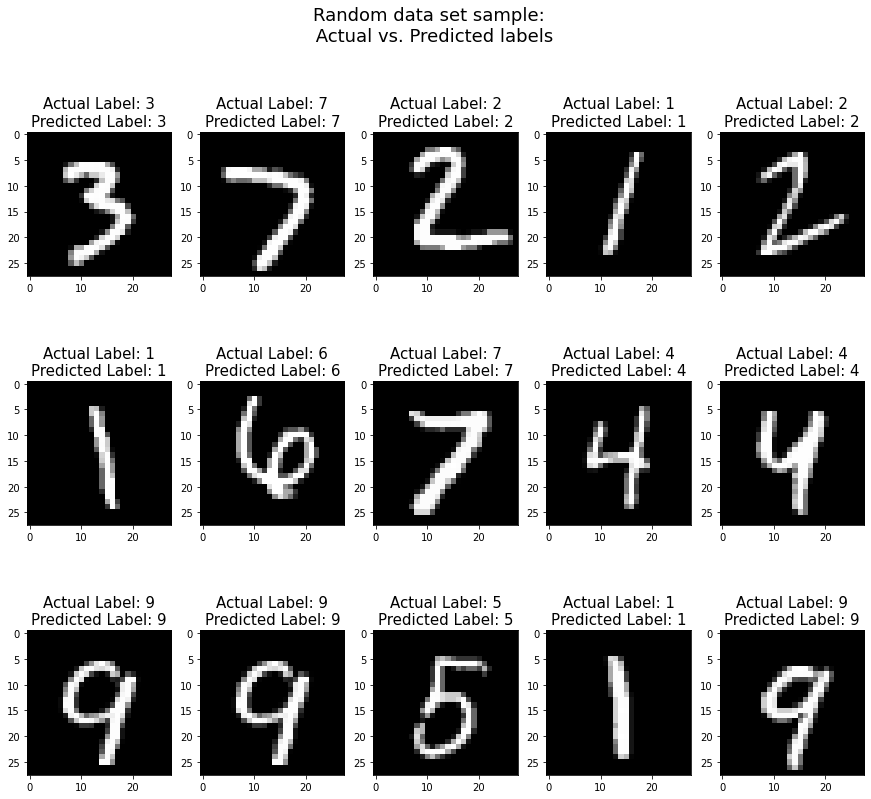

In [380]:
# Plot a training samples showing actual label and predicted label
X_test_revert = np.reshape(X_test,(-1,28,28))

rows = 3
samples = 5

fig, ax = plt.subplots(3,5,figsize=(15,13))
fig.suptitle('Random data set sample: \n Actual vs. Predicted labels', size=18)

for i in range(rows):
    for j in range(samples):
        rand = np.random.randint(0,50)
        y_predicted = np.argmax(predictions[rand])
        ax[i,j].imshow(X_test_revert[rand], interpolation='nearest',cmap='gray')
        ax[i,j].set_title('Actual Label: {}\nPredicted Label: {}'.format(np.argmax(y_test[rand]),y_predicted),size=15)

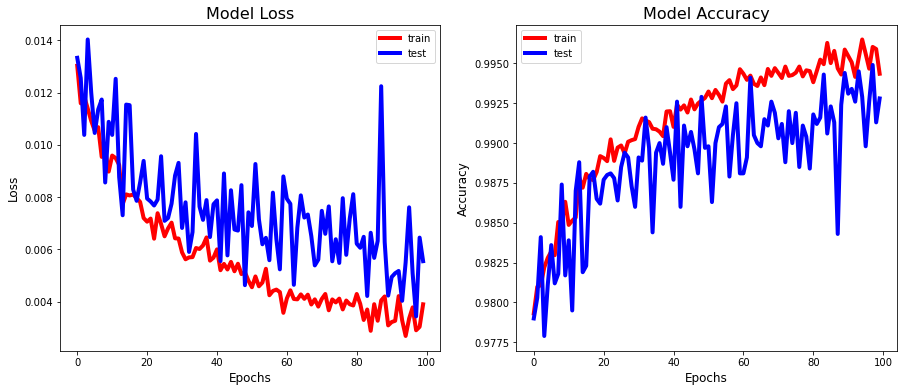

In [430]:
# Evaluate accuracy and loss plots

fig, (ax1, ax2) = plt.subplots(1,2,figsize=(15,6))

#Loss plot
ax1.plot(history.epoch, history.history["loss"], 'r', label='Training loss', linewidth = 4)
ax1.plot(history.epoch, history.history["val_loss"], 'b', label='Training loss',linewidth = 4)
ax1.set_title('Model Loss', size=16)
ax1.set_xlabel('Epochs', size=12)
ax1.set_ylabel('Loss', size=12)
ax1.legend(['train','test'],loc = 'upper right')

#Accuracy plot
ax2.plot(history.epoch, history.history["categorical_accuracy"], 'r', linewidth = 4)
ax2.plot(history.epoch, history.history["val_categorical_accuracy"], 'b',linewidth = 4)
ax2.set_title('Model Accuracy', size=16)
ax2.set_xlabel('Epochs', size=12)
ax2.set_ylabel('Accuracy', size=12)
ax2.legend(['train','test'],loc = 'upper left')